In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


In [ ]:
iris_data = load_iris()
iris = pd.DataFrame(iris_data.data)
iris_targets = pd.DataFrame(iris_data.target)

In [ ]:
print(iris.head())

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


In [ ]:
print(iris_targets.head())
print(iris_data.target_names)

   0
0  0
1  0
2  0
3  0
4  0
['setosa' 'versicolor' 'virginica']


In [ ]:
iris.shape

(150, 4)

In [ ]:
iris_targets.shape

(150, 1)

In [ ]:
X = iris_data.data
Y = iris_data.target

In [ ]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=7)
print(X_train.shape)
X_test.shape

(120, 4)


(30, 4)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)

In [ ]:
KNN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_predict = KNN.predict(X_test)

In [ ]:
y_predict

array([2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2])

In [ ]:
Y_test

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2])

In [ ]:
print("Accuracy ", accuracy_score(Y_test, y_predict))

Accuracy  0.9


In [ ]:
error = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, Y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i!=Y_test))
  print(np.mean(pred_i!=Y_test))

0.1
0.06666666666666667
0.1
0.06666666666666667
0.1
0.13333333333333333
0.13333333333333333
0.1
0.1
0.1
0.1
0.1
0.1
0.06666666666666667
0.1
0.1
0.1
0.1
0.1
0.13333333333333333
0.13333333333333333
0.13333333333333333
0.16666666666666666
0.16666666666666666
0.2
0.2
0.16666666666666666
0.1
0.1
0.16666666666666666
0.13333333333333333
0.16666666666666666
0.16666666666666666
0.16666666666666666
0.16666666666666666
0.16666666666666666
0.16666666666666666
0.16666666666666666
0.16666666666666666


Text(0, 0.5, 'Mean error')

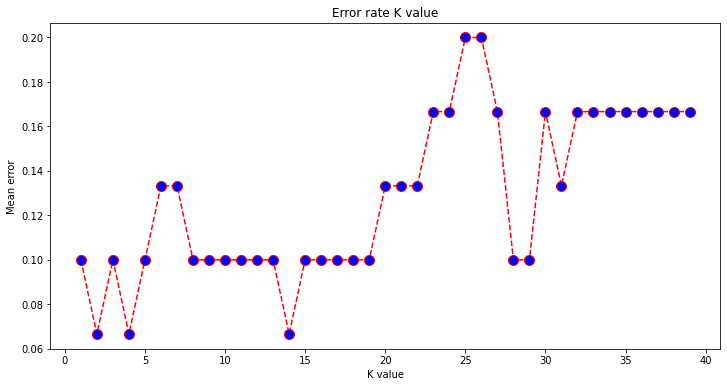

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color="red", linestyle="dashed", marker="o", markerfacecolor="blue", markersize=10)
plt.title("Error rate K value")
plt.xlabel("K value")
plt.ylabel("Mean error")